In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:

1) ! pip install -q kaggle

2) from google.colab import files

files.upload()

Choose the kaggle.json file that you downloaded
3) ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Make directory named kaggle and copy kaggle.json file there.
4) ! chmod 600 ~/.kaggle/kaggle.json

Change the permissions of the file.
5) ! kaggle datasets list
- That's all ! You can check if everything's okay by running this command.

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"themohal","key":"89753f473f9efbf59ae11bcd6a669259"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:56<00:00, 21.6MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.1MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import layers

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


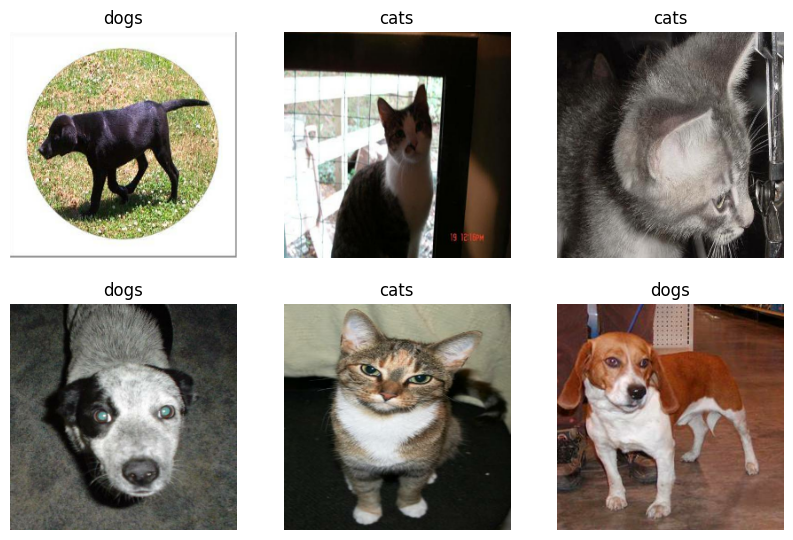

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
a = []
for image, label in train_ds.take(1):
    print (label)
    a.append(label)
#this prints batch of 32 labels assigned to images clearly it is 0 or 1
a[0].numpy()[0]

tf.Tensor([0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1], shape=(32,), dtype=int32)


0

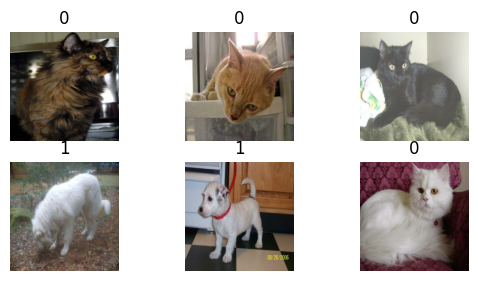

In [12]:
#checking what label is assigned to which class
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")
# So, 0 is assigned to cat class and 1 is assigned to dog class

In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [87]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [120]:
# create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(256,256,3), padding='same'))
# model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 64)      

In [122]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
epochs=10
history = model.fit(train_ds,epochs=epochs,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 56s 82ms/step - loss: 0.6210 - accuracy: 0.6471 - val_loss: 0.5768 - val_accuracy: 0.6984
Epoch 2/10
625/625 [==============================] - 50s 79ms/step - loss: 0.5175 - accuracy: 0.7448 - val_loss: 0.4599 - val_accuracy: 0.7986
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4515 - accuracy: 0.7923 - val_loss: 0.4270 - val_accuracy: 0.7990
Epoch 4/10
625/625 [==============================] - 50s 79ms/step - loss: 0.4057 - accuracy: 0.8173 - val_loss: 0.3851 - val_accuracy: 0.8296
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3667 - accuracy: 0.8378 - val_loss: 0.3579 - val_accuracy: 0.8374
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 0.3330 - accuracy: 0.8540 - val_loss: 0.3445 - val_accuracy: 0.8504
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3008 - accuracy: 0.8727 - val_loss: 0.4293 - val_accuracy:

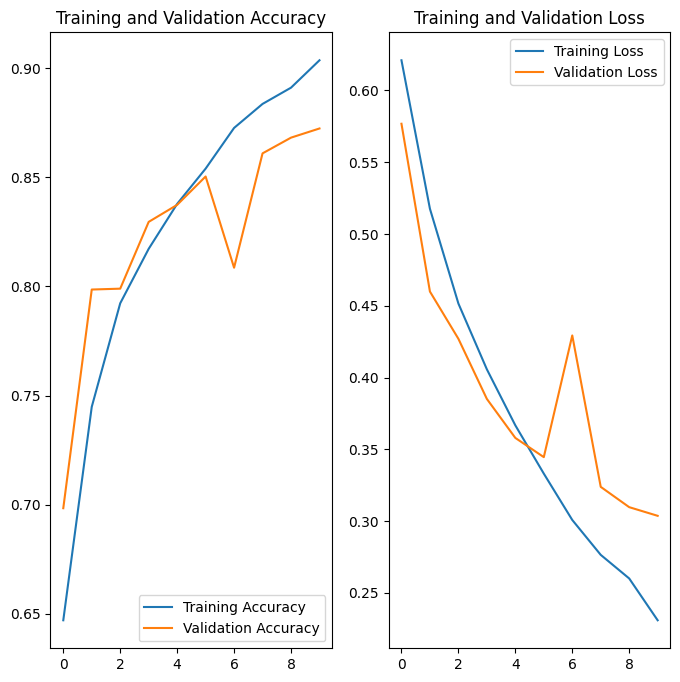

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [125]:
(loss, accuracy) = model.evaluate(validation_ds)
print(loss)
print(accuracy)
model.save('model.h5')

157/157 [==============================] - 8s 49ms/step - loss: 0.3036 - accuracy: 0.8724
0.3036450445652008
0.8723999857902527


In [25]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

1/1 [==============================] - 1s 1s/step


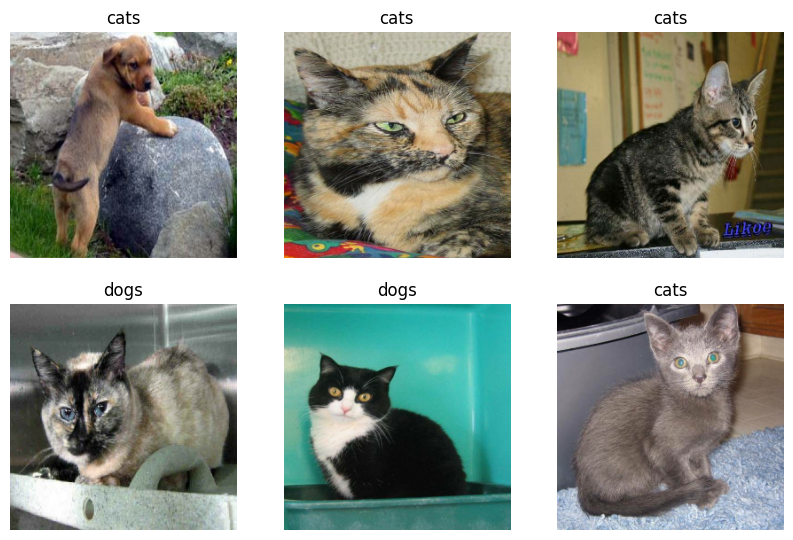

In [126]:
model = keras.models.load_model('model.h5')

predictions = model.predict(validation_ds.take(1))

plt.figure(figsize=(10, 10))
for images, labels in validation_ds.take(1):
  for i in range(6):
    predictedLabel = int(predictions[i] >= 0.5)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[predictedLabel])
    plt.axis("off")

In [127]:
import cv2

In [128]:
test_img = cv2.imread('/content/test/dogs/dog.10021.jpg')

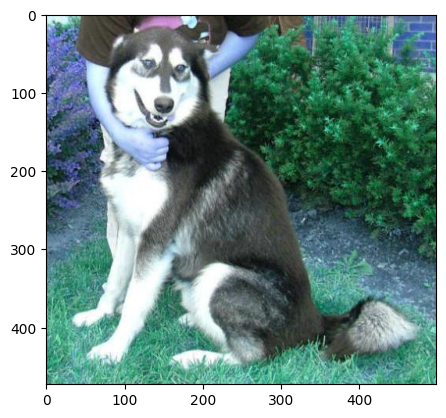

In [129]:
plt.imshow(test_img)

In [130]:
test_img.shape

(473, 499, 3)

In [131]:
test_img = cv2.resize(test_img,(256,256))

In [132]:
test_img.shape

(256, 256, 3)

In [133]:
test_input = test_img.reshape((1,256,256,3))

In [134]:
test_img.shape

(256, 256, 3)

In [135]:
result = int(model.predict(test_input)[0][0])
class_names[result]

1/1 [==============================] - 0s 221ms/step


'dogs'

In [139]:
import numpy as np
#to predict new images 
def predict_image(imagepath, classifier):
    predict = tf.keras.utils.load_img(imagepath, target_size = (256, 256))   
    predict_modified = tf.keras.utils.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)

In [145]:
predict_image("/content/test/dogs/dog.10421.jpg",model)

1/1 [==============================] - 0s 26ms/step
probability = 0.99976987
Prediction = dog
